In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [34]:
# FUNÇÃO CRIADA PARA CRIAÇÃO DOS GRÁFICOS

def reg_graph (x, y, data,sct_size=None,s=10,title='', legend_visibility=True, legend_title='', xlabel='', ylabel='', fit_intercept=True, ativar_grafico_yx=False,reg_from_start=False, offset_txt_x=0.15,offset_txt_y=2.25):
    # x = eixo x do gráfico
    # y = eixo y do gráfico
    # data = dataframe origem dos dados que representam x e y
    # sct_size = tamanho do scatter no gráfico BASEADO em uma coluna do dataframe
    # s = tamanho do scatter no gráfico BASEADO em um NUMERO
    # title = título do gráfico
    # legend_visibility = visibilidade da legenda
    # legend_title = título da legenda
    # xlabel = título do eixo x
    # ylabel = titulo do eixo y
    # offset_txt_x = deslocamento do texto da função no eixo x
    # offset_txt_y = deslocamento do texto da função no eixo y

    sns.set_style('darkgrid')

    f, ax = plt.subplots(1,figsize=(8, 5))

    sns.scatterplot(x=data[x], y=data[y], data=data,size=sct_size,s=s)

    rng = np.random.default_rng(1234) #seed para valores aleatórios
    lr = LinearRegression(fit_intercept=fit_intercept)
    fitted_reg = lr.fit(data[[x]],data[[y]])

    if not fit_intercept:
        fitted_reg.intercept_ = [fitted_reg.intercept_] # Prevenindo erros

    r2_score = fitted_reg.score(data[[x]],data[[y]]) # R² Score
    x_reg_line = rng.uniform(data[x].min(), data[x].max(), size=100) # gerando valores entre os valores do scatterplot para criar a reta
    y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0] # função y=ax + b para representar a reta criada

    if reg_from_start:

        if (data[x].min() < 0) and (abs(data[x].min()) > data[y].max()): # Para valores data[x] negativos

            x_reg_line = rng.uniform(data[x].min() * 2 , 0.0, size=1000000) # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[y].min() < 0) and (abs(data[y].min()) > data[x].max()): # Para valores data[y] negativos

            x_reg_line = rng.uniform(data[y].min() * 2 , 0.0, size=1000000) # gerando valores entre os valores do scatterplot para criar a reta, partindo do 0

        elif (data[x].max() > data[y].max()):

            x_reg_line = rng.uniform(0.0, data[x].max() * 2, size=1000000)

        else:

            x_reg_line = rng.uniform(0.0, data[y].max() * 2, size=1000000)

        y_reg_line = x_reg_line * fitted_reg.coef_ + fitted_reg.intercept_[0] # função y=ax + b para representar a reta criada


    text_coord_x = data[x].max() - data[x].max() * offset_txt_x  #eixo x do texto


    plt.text(text_coord_x, offset_txt_y, f'Y={round(fitted_reg.coef_[0][0],4)}x + {round(fitted_reg.intercept_[0],4)}',fontsize=12, ha='center', va='center',color='blue') #Texto da reta Azul
    plt.text(text_coord_x, offset_txt_y - (offset_txt_y*0.3), f'R²:{round(r2_score,4)}', fontsize=12, ha='center', va='center',color='blue') # Texto r²


    ax.set_ylim((0, (data[y].max() + (data[y].max()/2)))) # tamanho limite do plot no eixo y
    ax.set_xlim((0, data[x].max() + data[x].max()/2)) # tamanho limite do plot no eixo x
    ax.plot(x_reg_line,y_reg_line[0]) #reta de regressão

    if ativar_grafico_yx:
        y_x = rng.uniform(0, 1000, size=1000) # gerando 100 valores aleatórios
        ax.plot(y_x,y_x, 'k--') # reta y=x

    if legend_title:
        plt.legend(title=legend_title,loc='upper left').set_visible(legend_visibility) #legenda no canto superior esquerdo

    plt.title(title) # Título do gráfico
    plt.xlabel(xlabel) #Título do eixo X
    plt.ylabel(ylabel) #Título do eixo y
    plt.tight_layout() #Redimensionar melhor o gráfico
    plt.show() #Mostrar o gráfico

In [35]:
ameriflux = pd.read_csv('../../TORRE DE SANTAREM/Dataset/ameriflux-santarem-dados-original.csv',na_values=-9999) # Dados da AMERIFLUX
modis = pd.read_csv('./DadosNPPSatelite/filtered_scaled_Npp_500m.csv',header=None)

ameriflux = ameriflux.drop(['Time','Date'],axis=1).copy()

In [36]:
df = ameriflux[['GPP_uStar_f','Reco_uStar','NEE_uStar_f']].copy()
df['NPP?'] = df['GPP_uStar_f'] - df['Reco_uStar'] 
df[['NPP?','NEE_uStar_f']] # Linhas não nulas de nee


# A base de dados do ameriflux BASE seguem essa formatação para upload:
# https://ameriflux.lbl.gov/data/uploading-half-hourly-hourly-data/

#For all turbulent flux variables (e.g., gas, heat, momentum flux),
#a negative value indicates net flux of matter, energy, or momentum from the atmosphere to the ecosystem (flora and fauna). 
#The same convention applies to NEE. GPP and RECO are always positive values, where NEE = RECO – GPP.

# NPP = -NEE ?

,NPP?,NEE_uStar_f
0,-5.8804,5.880364
1,-5.8804,5.880364
2,-5.8804,5.880364
3,-5.8804,5.880364
4,-5.8804,5.880364
...,...,...
52555,-7.8876,7.887522
52556,-7.8876,7.887522
52557,-7.8876,7.887522
52558,-7.8875,7.887522


In [37]:
ameriflux['NPP'] = ameriflux['GPP_uStar_f'] - ameriflux['Reco_uStar'] 

#Os valores estão pequenos demais,
# achei no README do ameriflux um link para a documentação do pipeline de processamento que eles usam para fazer os fullset
# https://fluxnet.org/data/fluxnet2015-dataset/data-processing/
# https://github.com/fluxnet/ONEFlux

# Infelizmente, eles não especificam o cálculo usado para criar cada variável, além do código estar majoritariamente em C
# Mesmo no Paper de referência: https://www.nature.com/articles/s41597-020-0534-3

def uMolCo2_S_to_gC_Y(npp):
    
    npp['NPP'] = npp['NPP'].apply(lambda x: x/(10**6)) # umolCO2 m-2 s-1 / 10 ** 6 = molCO2 m-2 s-1
    
    npp['NPP'] *= 12 # molCO2 m-2 s-1  * gC/mol = gC m-2 s-1
    
    npp['NPP'] = npp['NPP']/(10**3) # gC m-2 s-1 / 10**3 = kgC m-2 s-1
    
    output_npp = npp.groupby(by='Year')['NPP'].sum() # kgC m-2 y-1  
    ## agrupando somando os valores, não tem diferença no r² do modelo
    
    output_npp = output_npp.reset_index().drop('Year',axis=1)
    
    return output_npp


npp_dataframe = uMolCo2_S_to_gC_Y(ameriflux)
npp_dataframe

,NPP
0,0.000037
1,0.000070
2,0.000076


In [38]:
def modis_npp(modis_data):
    
    modis_data = modis_data.loc[modis[2].isin(['A2009001','A2010001','A2011001'])].copy() # Dados de NPP nos anos de 2009, 2010 e 2011
    
    modis_data = modis_data.drop([0,1,3,4],axis=1).reset_index().drop('index',axis=1) # Retirando colunas com informações não relevantes e restabelecendo o dataframe a partir de um index 0 nas 2 linhas
    
    modis_data.columns = range(len(modis_data.columns.to_list())) # Reiniciando o index a partir do 0 para as colunas 
    
    modis_data.set_index(0,inplace=True) # Colocando o "Acquisition Date [ A (YYYYDDD) ]"  como index para legibilidade do dataframe
    
    modis_npp_mean = modis_data.mean(axis=1) # Média de NPP nesses anos 
    
    return modis_npp_mean

modis_npp_mean = modis_npp(modis)

In [39]:
npp_dataframe = {
    'ameriflux_NPP':npp_dataframe.values.reshape(1,-1)[0],
    'modis_NPP':modis_npp_mean.values
}
npp_dataframe = pd.DataFrame(npp_dataframe,index=['2009','2010','2011'])
npp_dataframe
# os valores de npp do modis estão "escalados" de acordo com o csv de "data scaled and filtered" do site 
# apesar do cálculo de npp da torre estar correto, ele difere dos de satélite quando este está escalado e no mesmo formato do mapa

,ameriflux_NPP,modis_NPP
2009,0.000037,1.204458
2010,0.000070,1.183961
2011,0.000076,1.227251


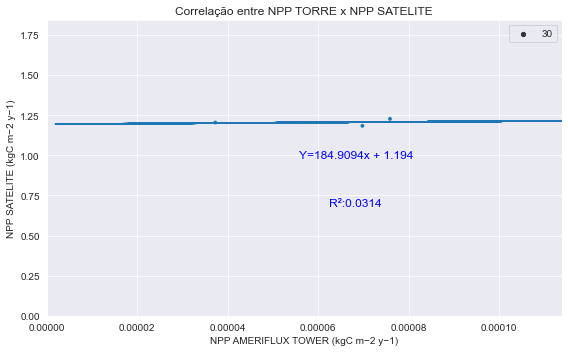

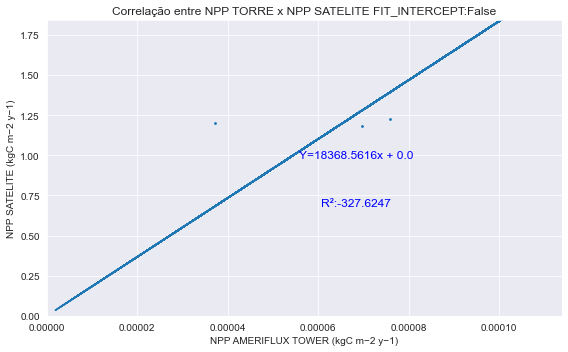

In [40]:
#(x, y, data,sct_size=10, title='', legend_visibility=True, legend_title=None, xlabel='', ylabel='', fit_intercept=True, ativar_grafico_yx=False,reg_from_start=False, offset_txt_x=0.15,offset_txt_y=2.25)
eixo_x = 'ameriflux_NPP'
eixo_y = 'modis_NPP'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER (kgC m−2 y−1)"
ylabel = "NPP SATELITE (kgC m−2 y−1)"
title = "Correlação entre NPP TORRE x NPP SATELITE"

reg_graph(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1)

reg_graph(eixo_x,eixo_y,data=data,xlabel=xlabel,ylabel=ylabel,title=title + ' FIT_INTERCEPT:False',fit_intercept=False,reg_from_start=True,legend_visibility=False,offset_txt_x=0.1,offset_txt_y=1)

In [41]:
ameriflux['NPP'] = ameriflux['NEE_uStar_f'] + ameriflux['Reco_uStar'] # Outro cálculo para o NPP


npp_dataframe = uMolCo2_S_to_gC_Y(ameriflux)

npp_dataframe = {
    'ameriflux_NPP':npp_dataframe.values.reshape(1,-1)[0],
    'modis_NPP':modis_npp_mean.values
}
npp_dataframe = pd.DataFrame(npp_dataframe,index=['2009','2010','2011'])
npp_dataframe

,ameriflux_NPP,modis_NPP
2009,0.001727,1.204458
2010,0.002179,1.183961
2011,0.001933,1.227251


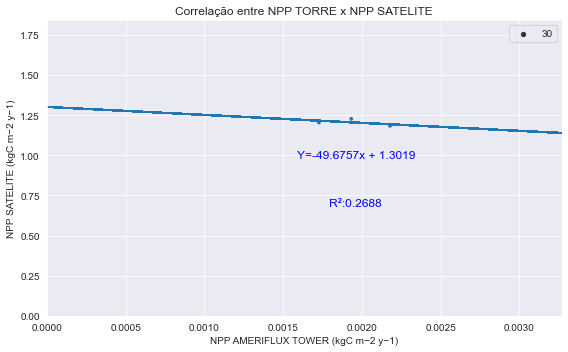

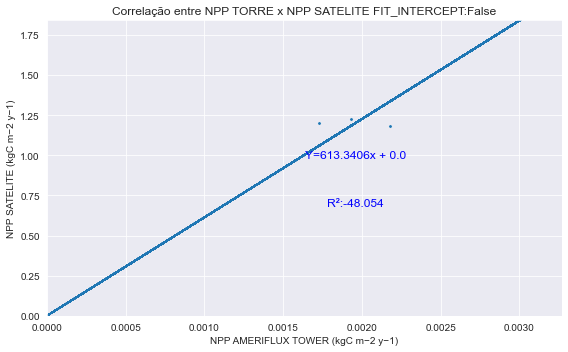

In [42]:
# Correlação do npp gerado através do outro cálculo enviado por email: NEE + RECO = NPP

eixo_x = 'ameriflux_NPP'
eixo_y = 'modis_NPP'
data = npp_dataframe
xlabel = "NPP AMERIFLUX TOWER (kgC m−2 y−1)"
ylabel = "NPP SATELITE (kgC m−2 y−1)"
title = "Correlação entre NPP TORRE x NPP SATELITE"

reg_graph(eixo_x,eixo_y,sct_size=30,data=data,xlabel=xlabel,ylabel=ylabel,title=title,legend_visibility=False,reg_from_start=True,offset_txt_x=0.1,offset_txt_y=1)

reg_graph(eixo_x,eixo_y,data=data,xlabel=xlabel,ylabel=ylabel,title=title + ' FIT_INTERCEPT:False',fit_intercept=False,reg_from_start=True,legend_visibility=False,offset_txt_x=0.1,offset_txt_y=1)